# 大作业

项目名称：基于历年来新股发行资料的统计与预测

项目针对的问题：本项目旨在分析、统计历年来新股发行规模、上市公司地区、承销商排行等因素，并对于公司上市所需支付的交易费用进行预测。本次大作业立项与第5次课后大作业并不一致，系本人因后续学习内容的发展相应更改了选题

预期达到的效果：分析发行数据，给出可视化图表，预测上市公司交易费用

拟采用的数据集：2015年12月1日-2020年11月30日新股发行资料，以上市日期为标准，数据来自于WIND

数据收集方法：由于数据来源于WIND，为数据库软件，而非普通的网页，难以爬取，故直接由软件下载相关数据并导入

本项目所需导入的相关库如下：

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Map,Geo
from pyecharts import options as opts
from wordcloud import WordCloud
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#for presenting Chinese characters
from matplotlib import rcParams
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

1.数据清洗导入与清洗

In [2]:
#数据导入并查看
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\大作业最终展示版\IPO.csv", parse_dates=['招股日期','网上发行日期','上市日期'])
pd.set_option('display.max_columns',None) # 设置显示最大列
data.head() # 显示数据前五行

,代码,名称,申购代码,招股日期,网上发行日期,上市日期,上市板,发行价格,发行市盈率,行业PE(披露值),发行数量总计(万股),新股发行数量(万股),老股转让数量(万股),网下配售数量(万股),网上发行数量(万股),回拨比例(%),预计募资(上市公司)(亿元),募资总额(上市公司)(亿元),募资净额(上市公司)(亿元),上市公司发行费用(万元),上市公司发行费率(%),老股转让费用(万元),转让费率(%),发行费用合计(万元),发行费率(%),承销及保荐费(万元),审计及验资费(万元),法律费用(万元),信息披露费(万元),发行方式,承销方式,主承销商,审计机构,资产评估机构,律师事务所,发行公告日期,承销商认购余股(万股),包销金额(万元),包销比例,面值,省份,证监会行业(2012版),证监会行业,Wind行业,证券类型,交易所,上市首日涨跌幅%,上市5日涨跌幅%,上市10日涨跌幅%,上市20日涨跌幅%
0,300910.SZ,瑞丰新材,300910.0,2020-11-09,2020-11-18,2020-11-27,创业板,30.26,47.43,28.90,3750.0,3750.0,0.0,1931.25,1818.75,20.0,3.82,11.35,10.42,9291.63,8.19,0.0,0.0,9291.63,8.19,7345.96,650.94,452.83,490.57,"网下询价,上网定价",余额包销,东兴证券股份有限公司,中汇会计师事务所(特殊普通合伙),上海立信资产评估有限公司,江苏世纪同仁律师事务所,2020/11/17,2.83,85.55,0.08,1.0,河南,化学原料和化学制品制造业,NaN,材料--材料Ⅱ--化工--基础化工,A股,深圳,240.38,-15.53,-26.46,NaN
1,003004.SZ,声迅股份,3004.0,2020-11-09,2020-11-17,2020-11-26,中小企业板,20.26,22.99,65.77,2046.0,2046.0,0.0,204.60,1841.40,50.0,4.15,4.15,3.78,3643.69,8.79,0.0,0.0,3643.69,8.79,2118.55,471.70,550.00,471.70,"网下询价,上网定价",余额包销,西部证券股份有限公司,永拓会计师事务所(特殊普通合伙),北京国融兴华资产评估有限责任公司,北京市康达律师事务所,2020/11/16,3.78,76.68,0.18,1.0,北京,软件和信息技术服务业,NaN,信息技术--技术硬件与设备--电子设备、仪器和元件--电子设备和仪器,A股,深圳,43.98,61.06,36.20,NaN
2,605177.SH,东亚药业,707177.0,2020-11-06,2020-11-16,2020-11-25,主板,31.13,22.99,53.30,2840.0,2840.0,0.0,284.00,2556.00,50.0,8.84,8.84,7.82,10165.35,11.50,0.0,0.0,10165.35,11.50,6143.87,2243.63,695.75,611.32,"网下询价,上网定价",余额包销,东兴证券股份有限公司,中汇会计师事务所(特殊普通合伙),坤元资产评估有限公司,上海市通力律师事务所,2020/11/13,8.52,265.21,0.30,1.0,浙江,医药制造业,NaN,医疗保健--制药、生物科技与生命科学--制药--西药,A股,上海,44.01,10.33,-2.61,NaN
3,300908.SZ,仲景食品,300908.0,2020-10-30,2020-11-11,2020-11-23,创业板,39.74,46.27,59.70,2500.0,2500.0,0.0,1287.50,1212.50,20.0,5.73,9.94,9.13,8075.34,8.13,0.0,0.0,8075.34,8.13,6749.53,450.00,300.66,537.74,"网下询价,上网定价",余额包销,国金证券股份有限公司,中天运会计师事务所(特殊普通合伙),北京亚太联华资产评估有限公司,北京市普华律师事务所,2020/11/10,2.73,108.44,0.11,1.0,河南,食品制造业,NaN,日常消费--食品、饮料与烟草--食品--食品加工与肉类,A股,深圳,203.98,-14.75,-14.06,NaN
4,688777.SH,中控技术,787777.0,2020-11-03,2020-11-11,2020-11-24,科创板,35.73,64.04,65.91,4913.0,4913.0,0.0,3697.00,1216.00,10.0,17.25,17.55,16.37,11808.88,6.73,0.0,0.0,11808.88,6.73,8259.23,1950.00,980.00,551.89,"战略配售,网下询价,上网定价",余额包销,申万宏源证券承销保荐有限责任公司,天健会计师事务所(特殊普通合伙),坤元资产评估有限公司,北京市金杜律师事务所,2020/11/10,2.10,74.98,0.04,1.0,浙江,软件和信息技术服务业,NaN,信息技术--软件与服务--信息技术服务--信息科技咨询与其它服务,A股,上海,204.03,6.97,6.37,NaN


In [3]:
data.shape # 读取表格行数和列数

(1435, 50)

In [4]:
data.info() # 显示表格数据基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   代码              1435 non-null   object        
 1   名称              1435 non-null   object        
 2   申购代码            1430 non-null   float64       
 3   招股日期            1428 non-null   datetime64[ns]
 4   网上发行日期          1428 non-null   datetime64[ns]
 5   上市日期            1435 non-null   datetime64[ns]
 6   上市板             1435 non-null   object        
 7   发行价格            1433 non-null   float64       
 8   发行市盈率           1431 non-null   float64       
 9   行业PE(披露值)       1423 non-null   float64       
 10  发行数量总计(万股)      1435 non-null   float64       
 11  新股发行数量(万股)      1430 non-null   float64       
 12  老股转让数量(万股)      1430 non-null   float64       
 13  网下配售数量(万股)      1201 non-null   float64       
 14  网上发行数量(万股)      1428 non-null   float64       
 15  回拨比例

In [5]:
#由于原数据为EXCEL格式，上市涨跌幅数据按照会计惯例用括号表示负号，无法识别为数字，故进行修改
data[['上市首日涨跌幅%','上市5日涨跌幅%','上市10日涨跌幅%']] \
= data[['上市首日涨跌幅%','上市5日涨跌幅%','上市10日涨跌幅%']] \
.replace( '[\$,)]','', regex=True ) \
.replace( '[(]','-',   regex=True ) \
.astype(float)

In [6]:
data.dtypes #描述表格数据类型

代码                        object
名称                        object
申购代码                     float64
招股日期              datetime64[ns]
网上发行日期            datetime64[ns]
上市日期              datetime64[ns]
上市板                       object
发行价格                     float64
发行市盈率                    float64
行业PE(披露值)                float64
发行数量总计(万股)               float64
新股发行数量(万股)               float64
老股转让数量(万股)               float64
网下配售数量(万股)               float64
网上发行数量(万股)               float64
回拨比例(%)                  float64
预计募资(上市公司)(亿元)           float64
募资总额(上市公司)(亿元)           float64
募资净额(上市公司)(亿元)           float64
上市公司发行费用(万元)             float64
上市公司发行费率(%)              float64
老股转让费用(万元)               float64
转让费率(%)                  float64
发行费用合计(万元)               float64
发行费率(%)                  float64
承销及保荐费(万元)               float64
审计及验资费(万元)               float64
法律费用(万元)                 float64
信息披露费(万元)                float64
发行方式                      object
承销方式      

In [7]:
#查看空值并统计数量
data.isna().sum()

代码                   0
名称                   0
申购代码                 5
招股日期                 7
网上发行日期               7
上市日期                 0
上市板                  0
发行价格                 2
发行市盈率                4
行业PE(披露值)           12
发行数量总计(万股)           0
新股发行数量(万股)           5
老股转让数量(万股)           5
网下配售数量(万股)         234
网上发行数量(万股)           7
回拨比例(%)              5
预计募资(上市公司)(亿元)       7
募资总额(上市公司)(亿元)       7
募资净额(上市公司)(亿元)       7
上市公司发行费用(万元)         4
上市公司发行费率(%)          7
老股转让费用(万元)           0
转让费率(%)              7
发行费用合计(万元)           4
发行费率(%)              7
承销及保荐费(万元)           4
审计及验资费(万元)           4
法律费用(万元)             4
信息披露费(万元)           20
发行方式                 0
承销方式                 3
主承销商                 2
审计机构                 2
资产评估机构              92
律师事务所                3
发行公告日期               7
承销商认购余股(万股)          5
包销金额(万元)             5
包销比例                 7
面值                   0
省份                   0
证监会行业(2012版)         0
证监会行业              353
Wind行业     

In [8]:
#删除全部为空值的列
data.dropna(how='all', axis=1, inplace=True) 
#处理“招股日期”列为空的情况，该类新股发行数据为比例换股等情况，并非常规的IPO
data.dropna(subset=['招股日期'], inplace=True)
#“证监会行业”列空值较多，由于有其他分类方式，故此处删除
data.drop(['证监会行业'], axis = 1, inplace= True)
data.isna().sum()

代码                  0
名称                  0
申购代码                0
招股日期                0
网上发行日期              0
上市日期                0
上市板                 0
发行价格                0
发行市盈率               0
行业PE(披露值)           5
发行数量总计(万股)          0
新股发行数量(万股)          0
老股转让数量(万股)          0
网下配售数量(万股)        227
网上发行数量(万股)          0
回拨比例(%)             0
预计募资(上市公司)(亿元)      0
募资总额(上市公司)(亿元)      0
募资净额(上市公司)(亿元)      0
上市公司发行费用(万元)        0
上市公司发行费率(%)         0
老股转让费用(万元)          0
转让费率(%)             0
发行费用合计(万元)          0
发行费率(%)             0
承销及保荐费(万元)          0
审计及验资费(万元)          0
法律费用(万元)            0
信息披露费(万元)          14
发行方式                0
承销方式                0
主承销商                0
审计机构                0
资产评估机构             86
律师事务所               1
发行公告日期              0
承销商认购余股(万股)         0
包销金额(万元)            0
包销比例                0
面值                  0
省份                  0
证监会行业(2012版)        0
Wind行业              0
证券类型                0
交易所                 0
上市首日涨跌幅%  

In [9]:
#“资产评估机构”、“律师事务所”列空值填充为“暂缺”
#“网下配售数量(万股)”、“信息披露费(万元)”列空值代表0
data.fillna({'资产评估机构': '暂缺', '律师事务所': '暂缺', '网下配售数量(万股)': 0, '信息披露费(万元)': 0}, inplace=True)
data.isna().sum()

代码                0
名称                0
申购代码              0
招股日期              0
网上发行日期            0
上市日期              0
上市板               0
发行价格              0
发行市盈率             0
行业PE(披露值)         5
发行数量总计(万股)        0
新股发行数量(万股)        0
老股转让数量(万股)        0
网下配售数量(万股)        0
网上发行数量(万股)        0
回拨比例(%)           0
预计募资(上市公司)(亿元)    0
募资总额(上市公司)(亿元)    0
募资净额(上市公司)(亿元)    0
上市公司发行费用(万元)      0
上市公司发行费率(%)       0
老股转让费用(万元)        0
转让费率(%)           0
发行费用合计(万元)        0
发行费率(%)           0
承销及保荐费(万元)        0
审计及验资费(万元)        0
法律费用(万元)          0
信息披露费(万元)         0
发行方式              0
承销方式              0
主承销商              0
审计机构              0
资产评估机构            0
律师事务所             0
发行公告日期            0
承销商认购余股(万股)       0
包销金额(万元)          0
包销比例              0
面值                0
省份                0
证监会行业(2012版)      0
Wind行业            0
证券类型              0
交易所               0
上市首日涨跌幅%          0
上市5日涨跌幅%          0
上市10日涨跌幅%         0
dtype: int64

In [10]:
#“行业PE(披露值)”用同行业数据代替
data['行业PE(披露值)'] = data['行业PE(披露值)']\
.fillna(data.groupby('证监会行业(2012版)')['行业PE(披露值)']\
.transform('mean'))
#查看是否还存在空值
data.isna().sum()

代码                0
名称                0
申购代码              0
招股日期              0
网上发行日期            0
上市日期              0
上市板               0
发行价格              0
发行市盈率             0
行业PE(披露值)         3
发行数量总计(万股)        0
新股发行数量(万股)        0
老股转让数量(万股)        0
网下配售数量(万股)        0
网上发行数量(万股)        0
回拨比例(%)           0
预计募资(上市公司)(亿元)    0
募资总额(上市公司)(亿元)    0
募资净额(上市公司)(亿元)    0
上市公司发行费用(万元)      0
上市公司发行费率(%)       0
老股转让费用(万元)        0
转让费率(%)           0
发行费用合计(万元)        0
发行费率(%)           0
承销及保荐费(万元)        0
审计及验资费(万元)        0
法律费用(万元)          0
信息披露费(万元)         0
发行方式              0
承销方式              0
主承销商              0
审计机构              0
资产评估机构            0
律师事务所             0
发行公告日期            0
承销商认购余股(万股)       0
包销金额(万元)          0
包销比例              0
面值                0
省份                0
证监会行业(2012版)      0
Wind行业            0
证券类型              0
交易所               0
上市首日涨跌幅%          0
上市5日涨跌幅%          0
上市10日涨跌幅%         0
dtype: int64

In [11]:
#查看具体情况
data[data['行业PE(披露值)'].isna()]

,代码,名称,申购代码,招股日期,网上发行日期,上市日期,上市板,发行价格,发行市盈率,行业PE(披露值),发行数量总计(万股),新股发行数量(万股),老股转让数量(万股),网下配售数量(万股),网上发行数量(万股),回拨比例(%),预计募资(上市公司)(亿元),募资总额(上市公司)(亿元),募资净额(上市公司)(亿元),上市公司发行费用(万元),上市公司发行费率(%),老股转让费用(万元),转让费率(%),发行费用合计(万元),发行费率(%),承销及保荐费(万元),审计及验资费(万元),法律费用(万元),信息披露费(万元),发行方式,承销方式,主承销商,审计机构,资产评估机构,律师事务所,发行公告日期,承销商认购余股(万股),包销金额(万元),包销比例,面值,省份,证监会行业(2012版),Wind行业,证券类型,交易所,上市首日涨跌幅%,上市5日涨跌幅%,上市10日涨跌幅%
355,601816.SH,京沪高铁,780816.0,2019-12-25,2020-01-06,2020-01-16,主板,4.88,23.39,NaN,628563.0,628563.0,0.0,394184.0,234379.0,22.29,306.74,306.74,306.34,4033.32,0.13,0.0,0.0,4033.32,0.13,1736.26,362.26,141.51,679.25,"战略配售,网下询价,上网定价",余额包销,中信建投证券股份有限公司,天职国际会计师事务所(特殊普通合伙),北京中企华资产评估有限责任公司,北京市金杜律师事务所,2020/1/3,1345.3,6565.09,0.21,1.0,北京,铁路运输业,工业--运输--公路与铁路运输--铁路运输,A股,上海,38.73,4.14,14.18
356,601816.SH,京沪高铁,780816.0,2019-12-25,2020-01-06,2020-01-16,主板,4.88,23.39,NaN,628563.0,628563.0,0.0,394184.0,234379.0,22.29,306.74,306.74,306.34,4033.32,0.13,0.0,0.0,4033.32,0.13,1736.26,362.26,141.51,679.25,"战略配售,网下询价,上网定价",余额包销,中国国际金融股份有限公司,天职国际会计师事务所(特殊普通合伙),北京中企华资产评估有限责任公司,北京市金杜律师事务所,2020/1/3,1345.3,6565.09,0.21,1.0,北京,铁路运输业,工业--运输--公路与铁路运输--铁路运输,A股,上海,38.73,4.14,14.18
357,601816.SH,京沪高铁,780816.0,2019-12-25,2020-01-06,2020-01-16,主板,4.88,23.39,NaN,628563.0,628563.0,0.0,394184.0,234379.0,22.29,306.74,306.74,306.34,4033.32,0.13,0.0,0.0,4033.32,0.13,1736.26,362.26,141.51,679.25,"战略配售,网下询价,上网定价",余额包销,中信证券股份有限公司,天职国际会计师事务所(特殊普通合伙),北京中企华资产评估有限责任公司,北京市金杜律师事务所,2020/1/3,1345.3,6565.09,0.21,1.0,北京,铁路运输业,工业--运输--公路与铁路运输--铁路运输,A股,上海,38.73,4.14,14.18


In [12]:
#铁路运输业新股发行市盈率均为空值，故以当前行业市盈率代替
data.fillna({'行业PE(披露值)': 21.67}, inplace=True)
data.isna().sum()

代码                0
名称                0
申购代码              0
招股日期              0
网上发行日期            0
上市日期              0
上市板               0
发行价格              0
发行市盈率             0
行业PE(披露值)         0
发行数量总计(万股)        0
新股发行数量(万股)        0
老股转让数量(万股)        0
网下配售数量(万股)        0
网上发行数量(万股)        0
回拨比例(%)           0
预计募资(上市公司)(亿元)    0
募资总额(上市公司)(亿元)    0
募资净额(上市公司)(亿元)    0
上市公司发行费用(万元)      0
上市公司发行费率(%)       0
老股转让费用(万元)        0
转让费率(%)           0
发行费用合计(万元)        0
发行费率(%)           0
承销及保荐费(万元)        0
审计及验资费(万元)        0
法律费用(万元)          0
信息披露费(万元)         0
发行方式              0
承销方式              0
主承销商              0
审计机构              0
资产评估机构            0
律师事务所             0
发行公告日期            0
承销商认购余股(万股)       0
包销金额(万元)          0
包销比例              0
面值                0
省份                0
证监会行业(2012版)      0
Wind行业            0
证券类型              0
交易所               0
上市首日涨跌幅%          0
上市5日涨跌幅%          0
上市10日涨跌幅%         0
dtype: int64

Text(0.5, 1.0, 'IPO主承销金额(亿元)')

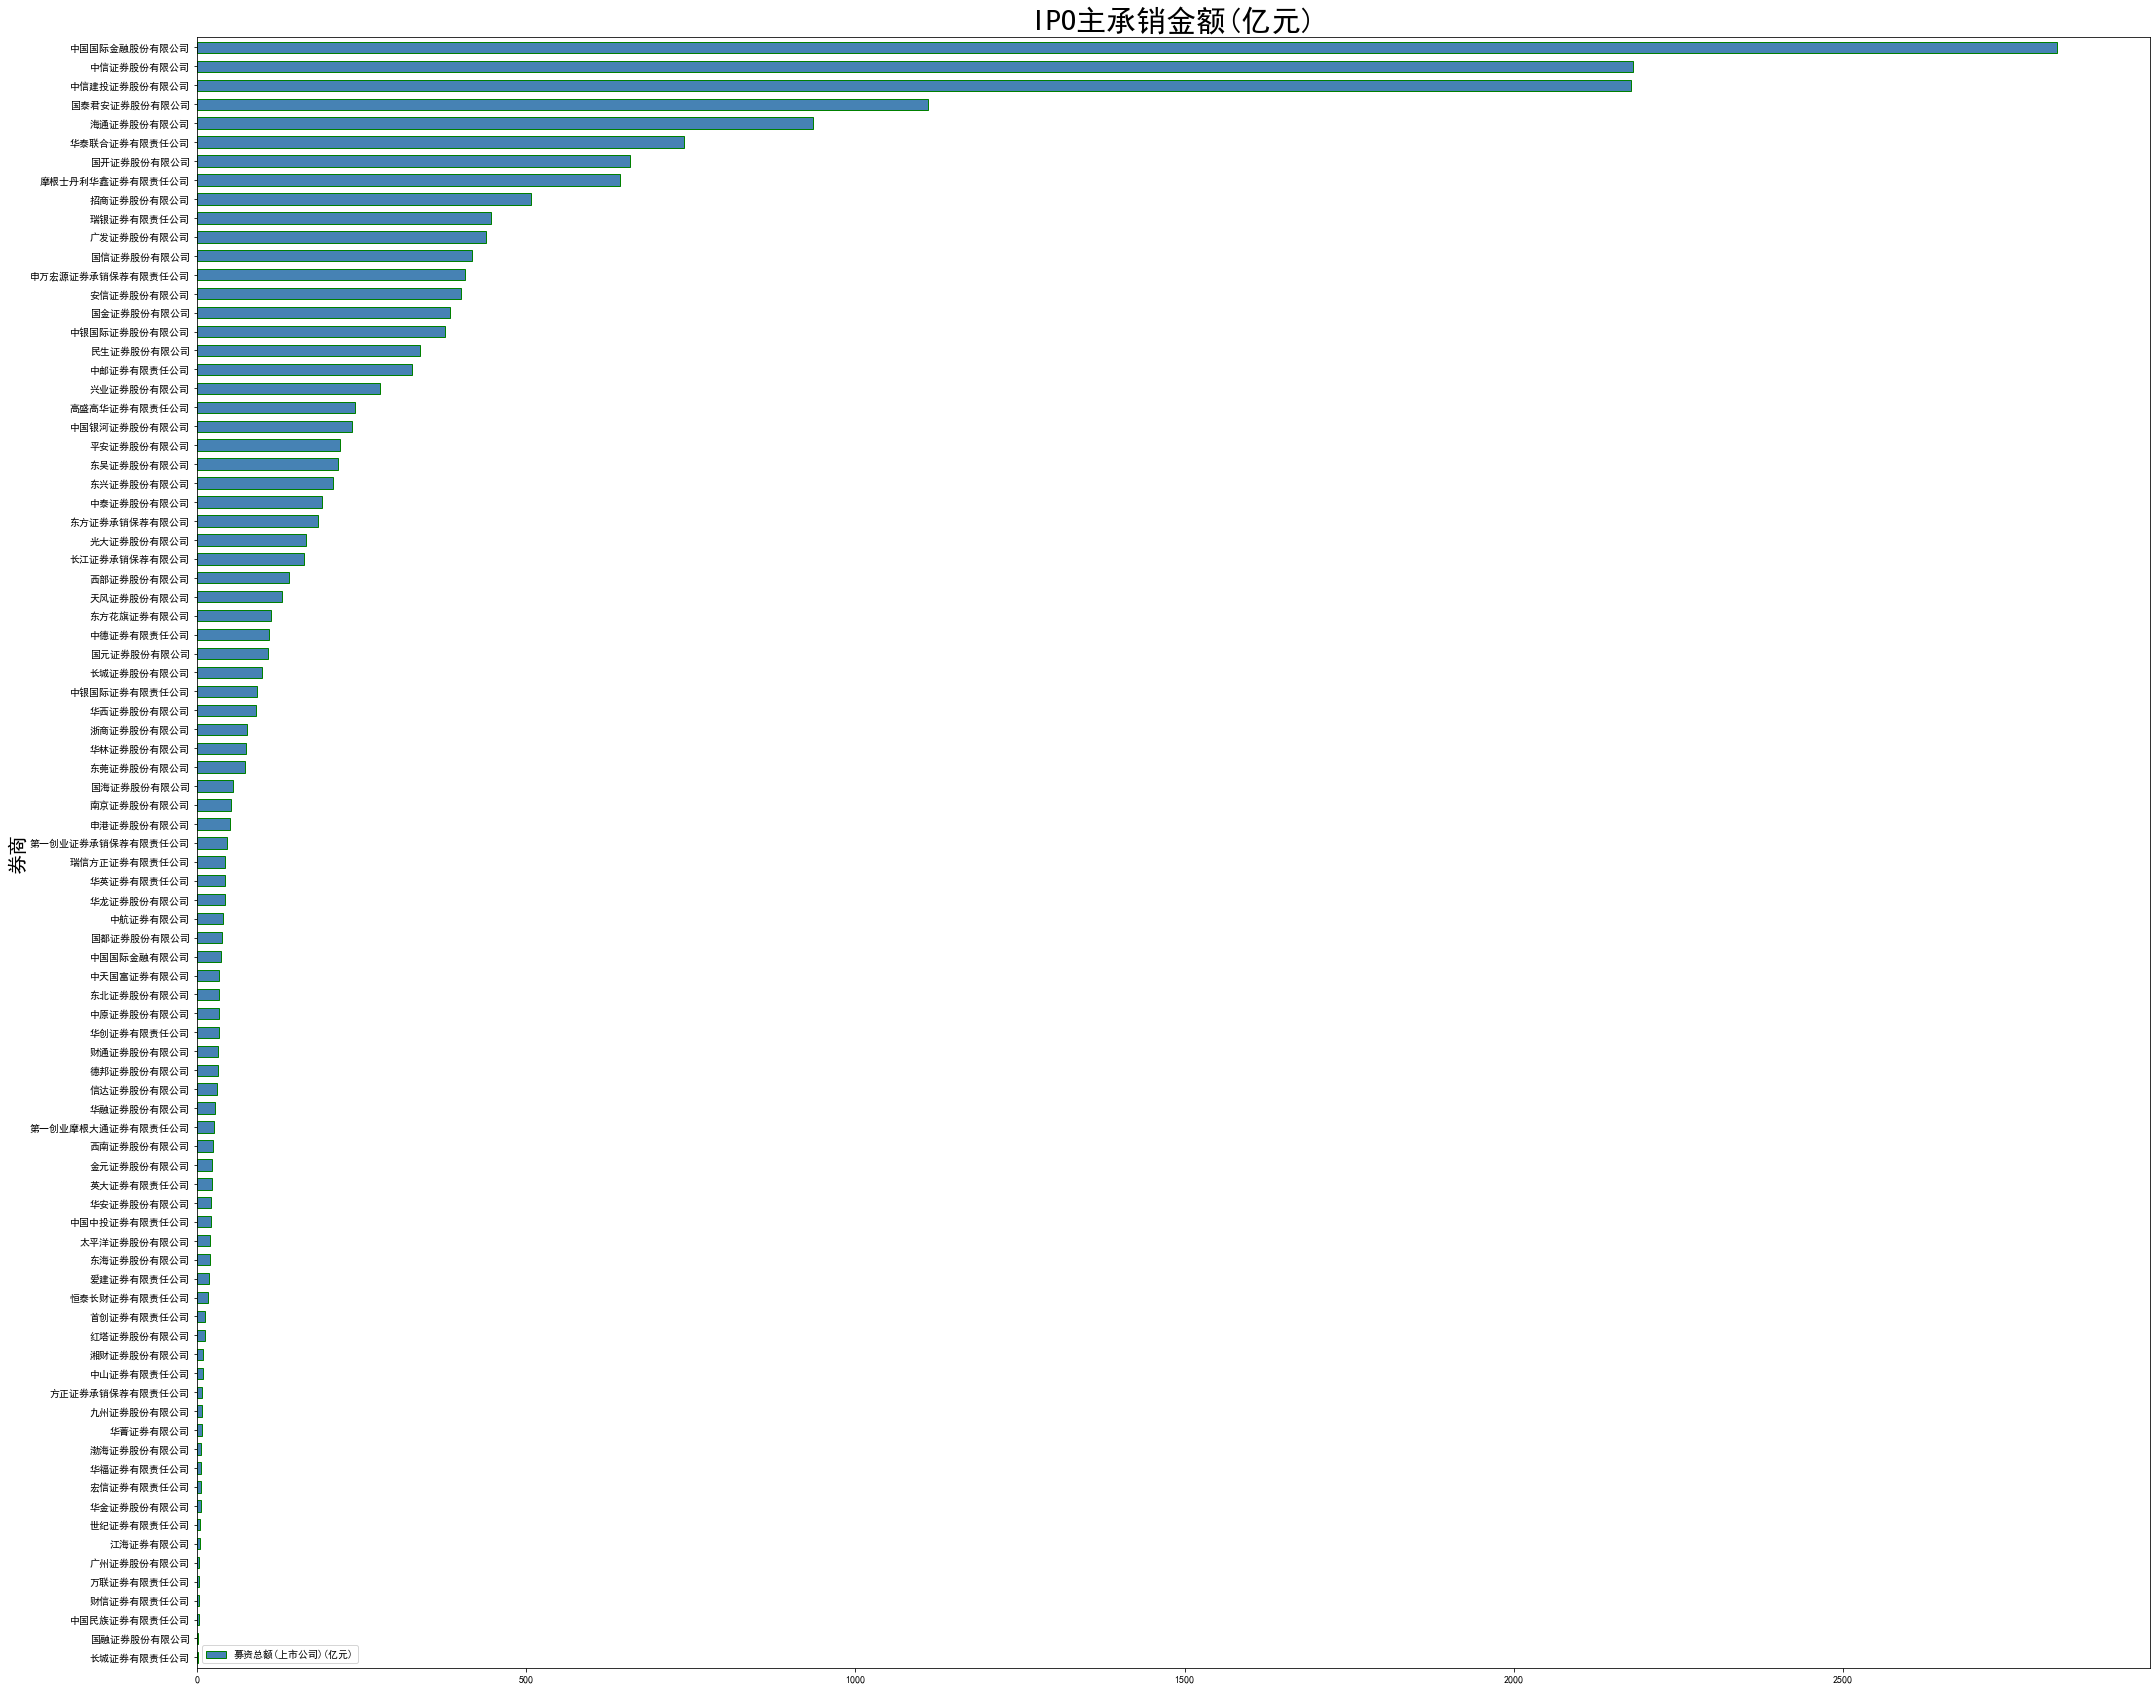

In [13]:
#同时，填充时发现，存在证券名称重复列，具体看来其中仅有主承销商不一致，可知该类数据为IPO有多个主承销商的情况，故先统计承销商相应数据再去重
data.groupby(['主承销商'])\
.agg({'募资总额(上市公司)(亿元)' : sum})\
.sort_values('募资总额(上市公司)(亿元)', ascending = True)\
.plot(kind = 'barh', legend = True, width=0.6, \
      figsize = [35,30], color = 'steelblue', edgecolor = 'green')
plt.ylabel('券商', fontsize=20)
plt.title('IPO主承销金额(亿元)', fontsize=30)

Text(0.5, 1.0, 'IPO承销保荐费')

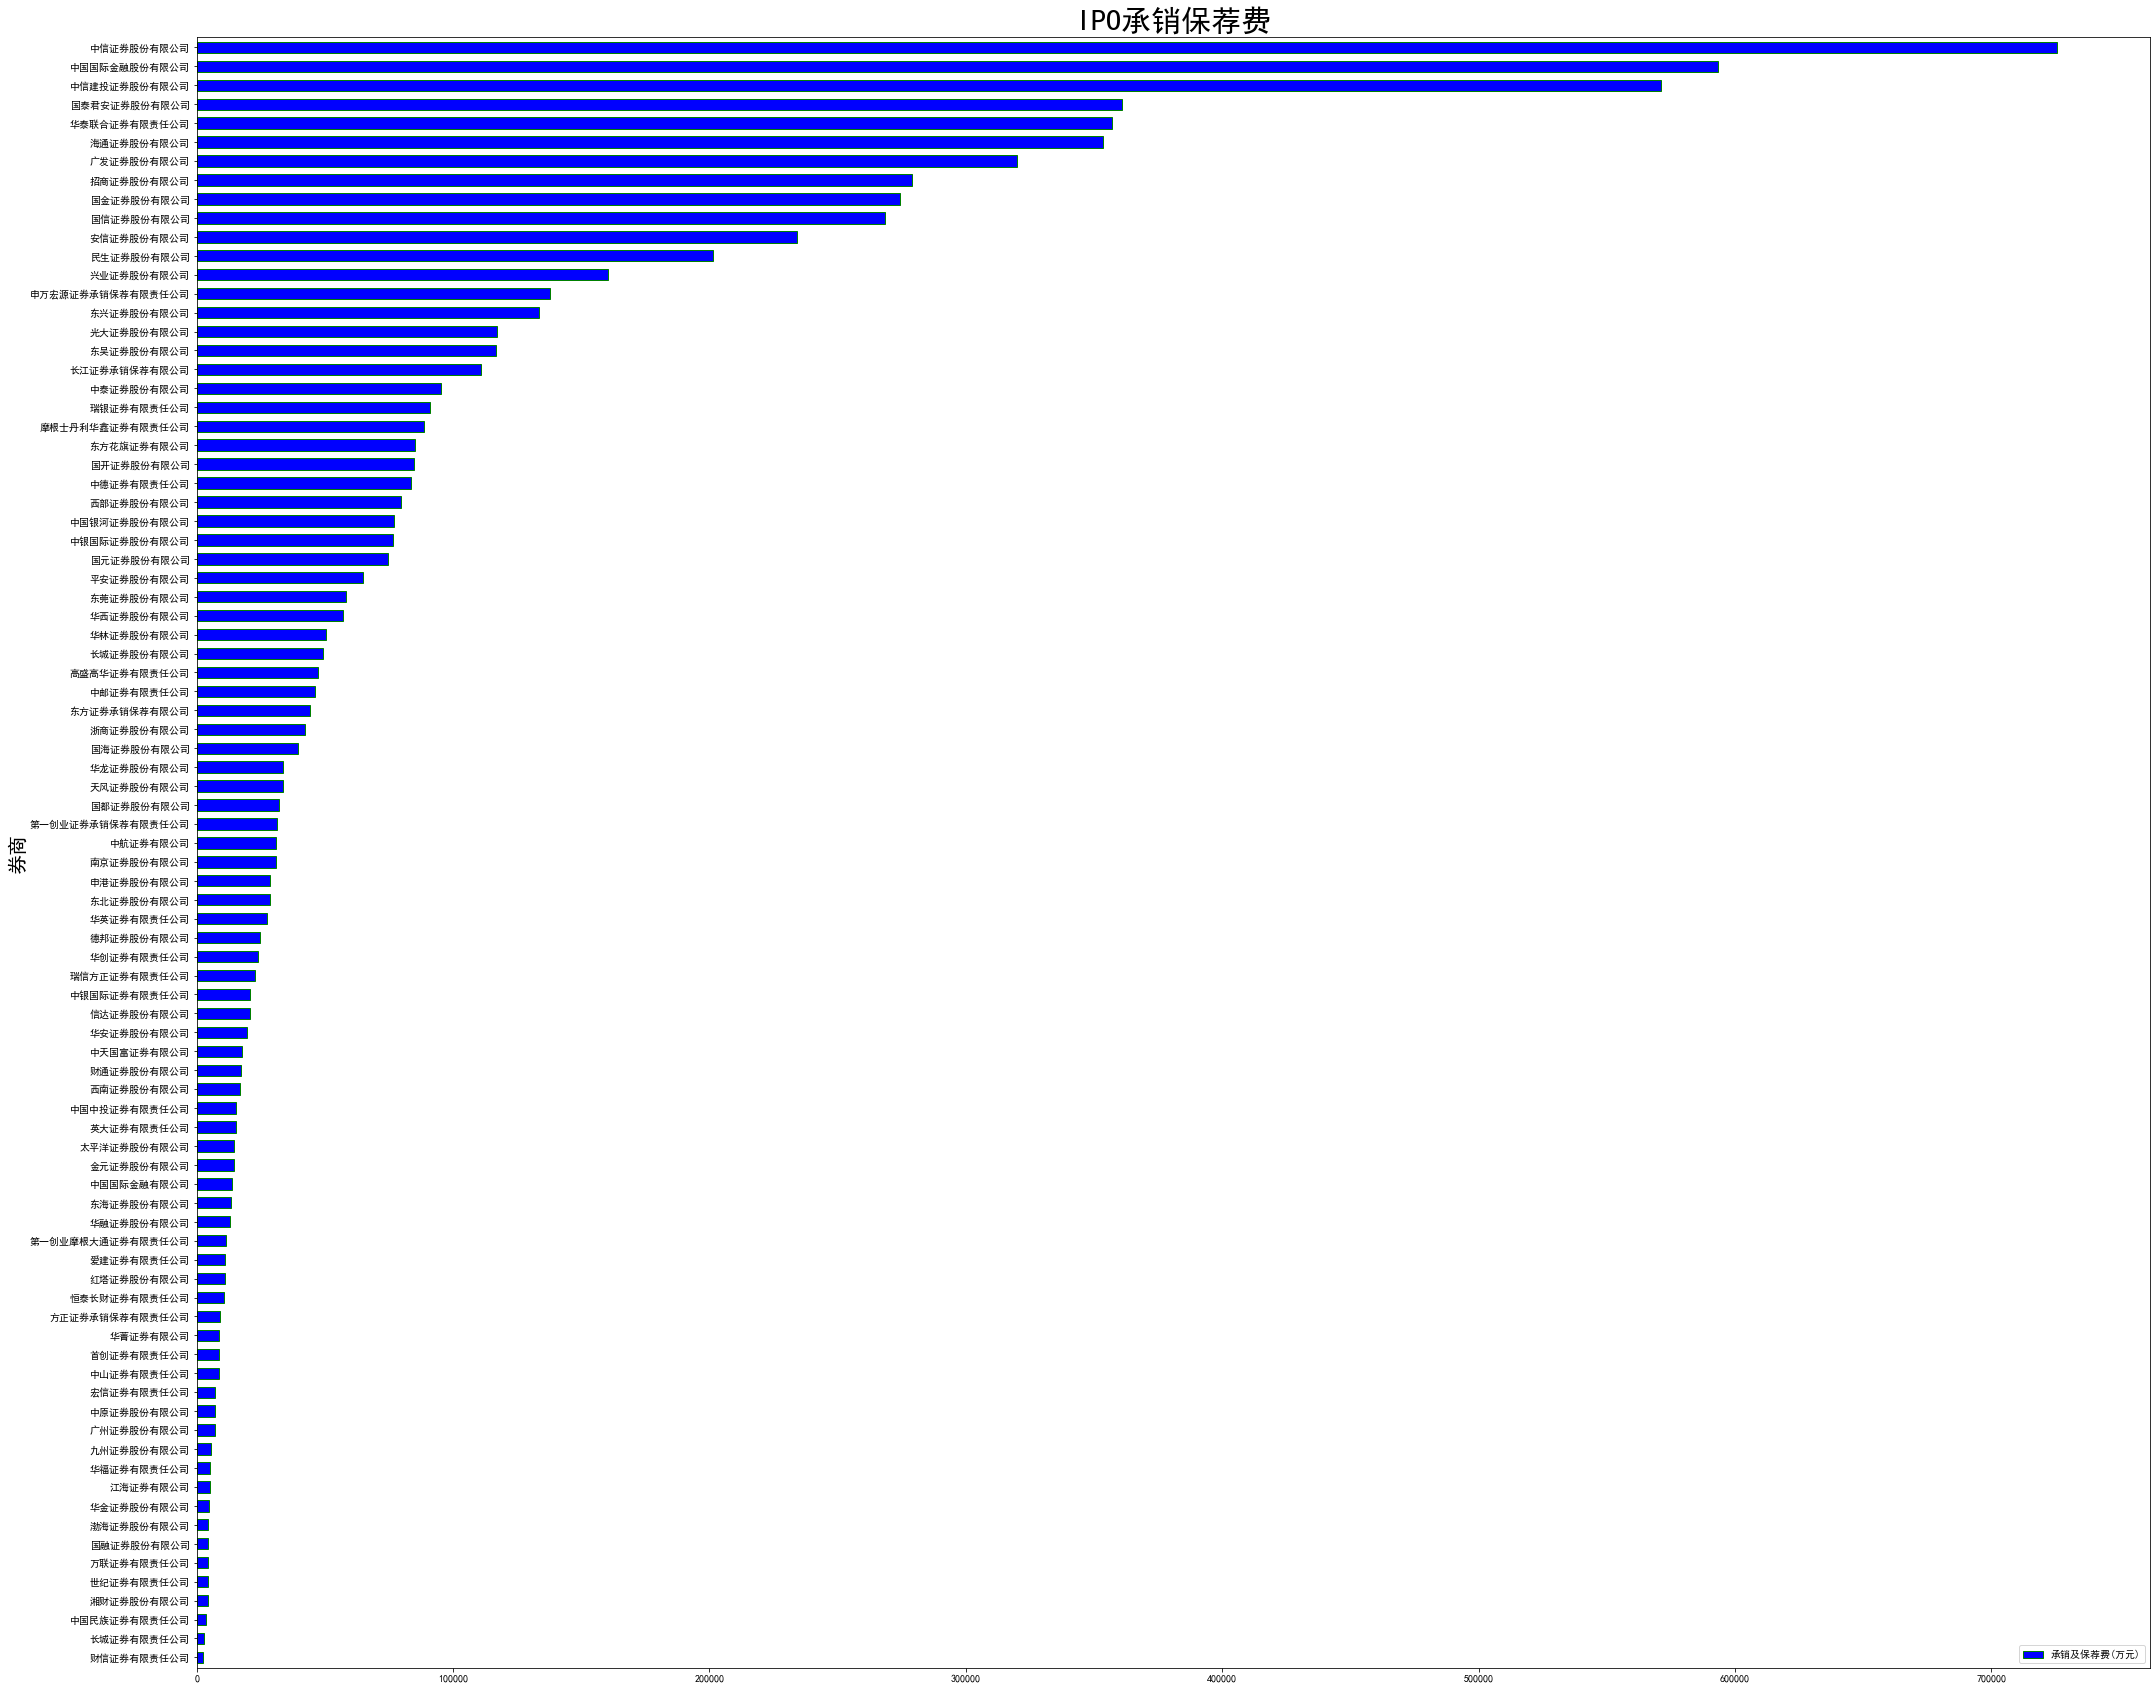

In [14]:
#统计“主承销商” 和“承销及保荐费(万元)”
data.groupby(["主承销商"])\
.agg({'承销及保荐费(万元)' : sum})\
.sort_values('承销及保荐费(万元)', ascending = True)\
.plot(kind = 'barh', legend = True, width=0.6, \
      figsize = [35,30], color = 'blue', edgecolor = 'green')
plt.ylabel("券商", fontsize=20)
plt.title("IPO承销保荐费", fontsize=30)

In [15]:
#去重，统计其他指标
dataV2 = data.drop_duplicates(subset='名称')
dataV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322 entries, 0 to 1427
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   代码              1322 non-null   object        
 1   名称              1322 non-null   object        
 2   申购代码            1322 non-null   float64       
 3   招股日期            1322 non-null   datetime64[ns]
 4   网上发行日期          1322 non-null   datetime64[ns]
 5   上市日期            1322 non-null   datetime64[ns]
 6   上市板             1322 non-null   object        
 7   发行价格            1322 non-null   float64       
 8   发行市盈率           1322 non-null   float64       
 9   行业PE(披露值)       1322 non-null   float64       
 10  发行数量总计(万股)      1322 non-null   float64       
 11  新股发行数量(万股)      1322 non-null   float64       
 12  老股转让数量(万股)      1322 non-null   float64       
 13  网下配售数量(万股)      1322 non-null   float64       
 14  网上发行数量(万股)      1322 non-null   float64       
 15  回拨比例

Text(0, 0.5, '')

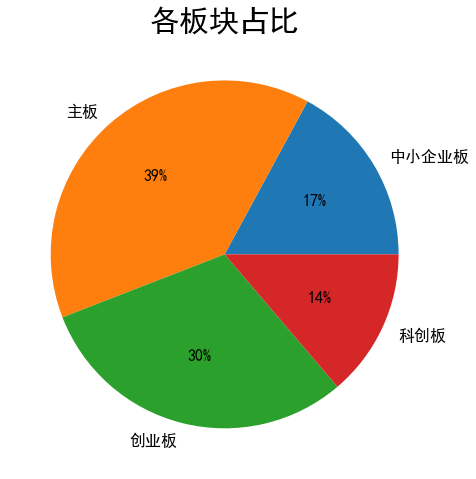

In [16]:
#分析各版块占比
df = dataV2.groupby('上市板').size()
df.plot(kind='pie', figsize=(8, 8), \
        textprops = {'fontsize':16}, autopct='%.0f%%') #显示百分比(FLOAT)
plt.title("各板块占比", fontsize=30)
plt.ylabel("")

Text(0.5, 1.0, '各版块发行市盈率')

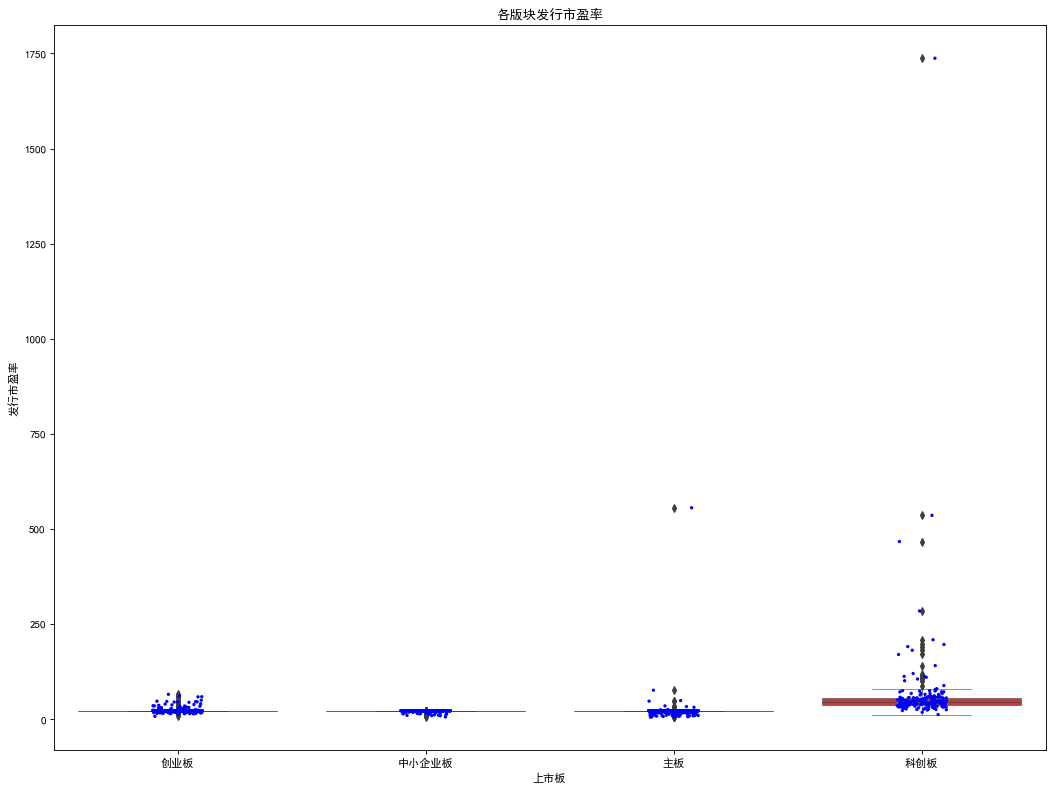

In [17]:
#统计分析各版块发行市盈率
plt.figure(figsize=(16, 12), dpi=80)
sns.boxplot(x="上市板", y="发行市盈率", data=dataV2, linewidth = 0.5) #使用seaborn绘制数据箱线图
sns.stripplot(x='上市板', y='发行市盈率', data=dataV2, color='blue', size=3) #使用seaborn绘制数据散点图
plt.title('各版块发行市盈率')

<ipython-input-18-83da02286f95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataV2['上市公司发行费用分布'] = pd.cut(dataV2['上市公司发行费用(万元)'], bins, labels) #按照设置区间划分数据并存入表格指定列


Text(0.5, 1.0, '上市公司发行费用(万元)')

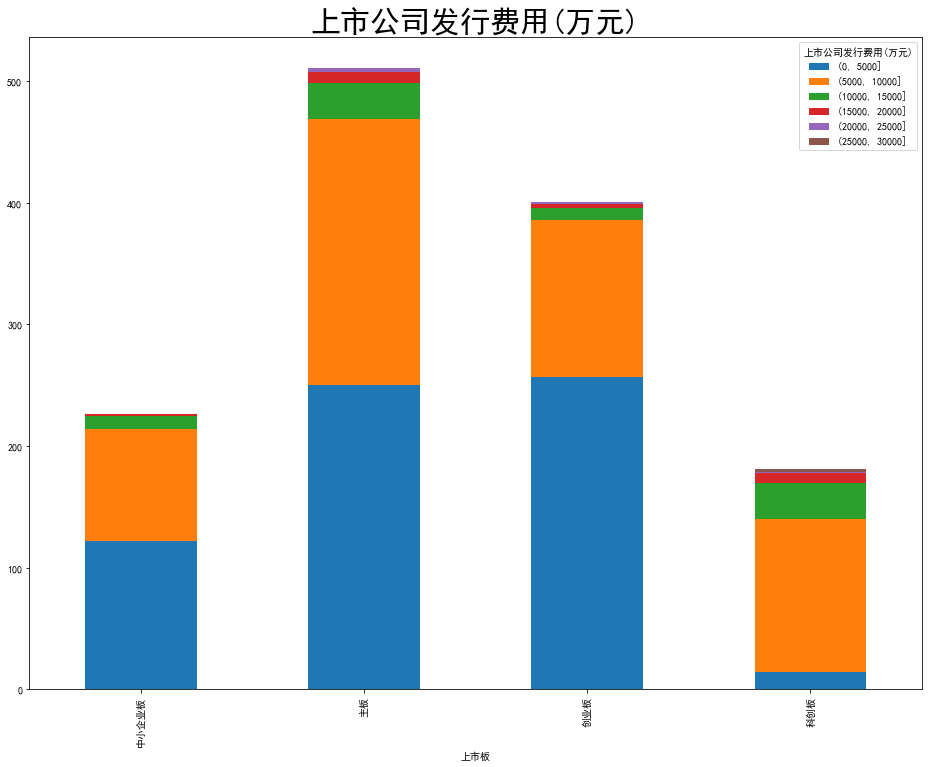

In [18]:
#统计分析上市公司发行费用(万元)
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000] #设定数据分割区间
labels=['0~5000', '5000~10000', '10000~15000', '15000~20000', '20000~25000', '25000~30000'] #设置区间标签
dataV2['上市公司发行费用分布'] = pd.cut(dataV2['上市公司发行费用(万元)'], bins, labels) #按照设置区间划分数据并存入表格指定列
dataV2.groupby(['上市板', '上市公司发行费用分布'])\
           .size().unstack()\
           .plot(kind = 'bar', stacked =True, figsize=(16, 12)) #按照板块分类绘制堆积柱状图
plt.legend(loc= 'best', title ='上市公司发行费用(万元)')
plt.title('上市公司发行费用(万元)', fontsize = 30)

Text(0.5, 1.0, '上市公司发行费用(万元)箱线图')

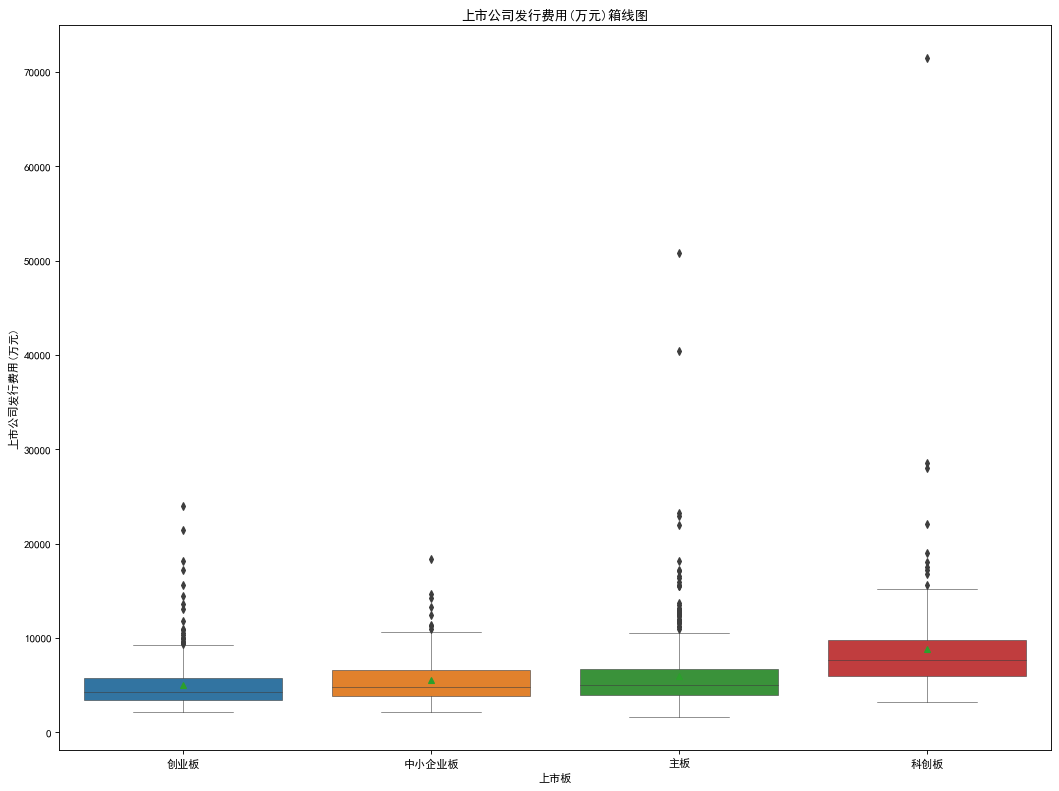

In [19]:
plt.figure(figsize=[16, 12], dpi=80)
sns.boxplot(x="上市板", y="上市公司发行费用(万元)", data=dataV2, linewidth = 0.5, showmeans = True) #绘制箱线图，绿色箭头标记中位数
plt.title('上市公司发行费用(万元)箱线图')

Text(0, 0.5, '家数')

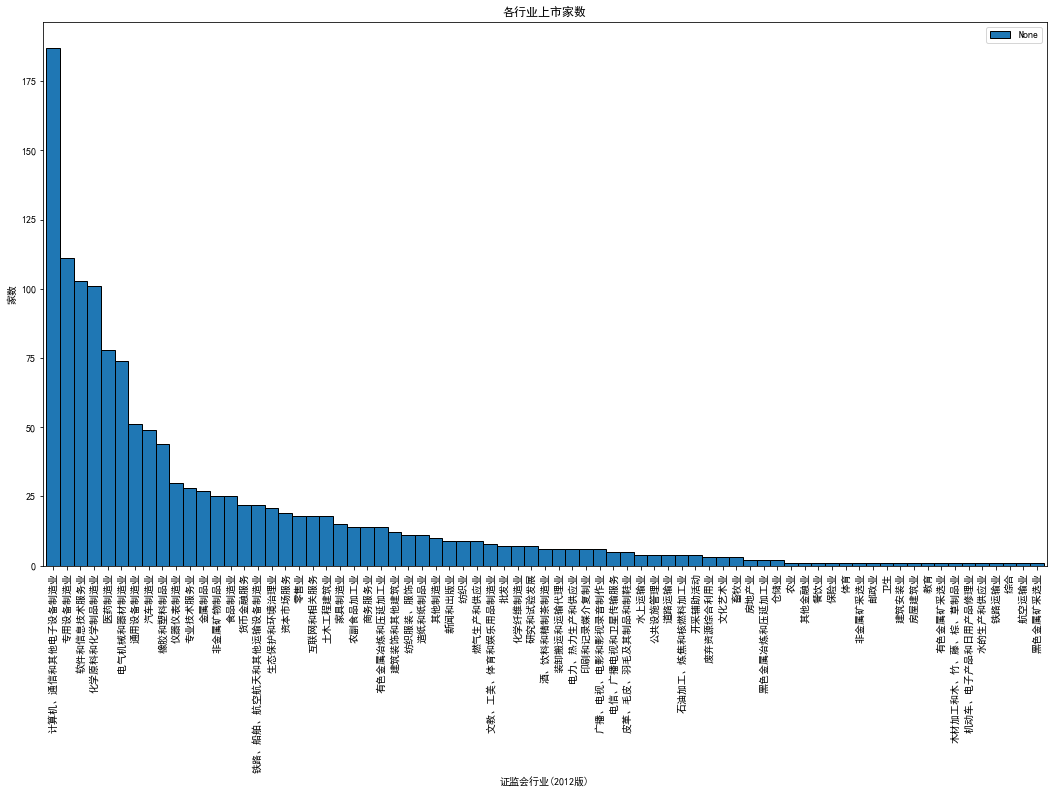

In [20]:
#统计行业
df = dataV2.groupby('证监会行业(2012版)').size().sort_values(ascending=False)
df.plot(kind='bar', figsize=(18, 10), legend=True, edgecolor = 'black', width = 1)
plt.title("各行业上市家数")
plt.ylabel('家数')

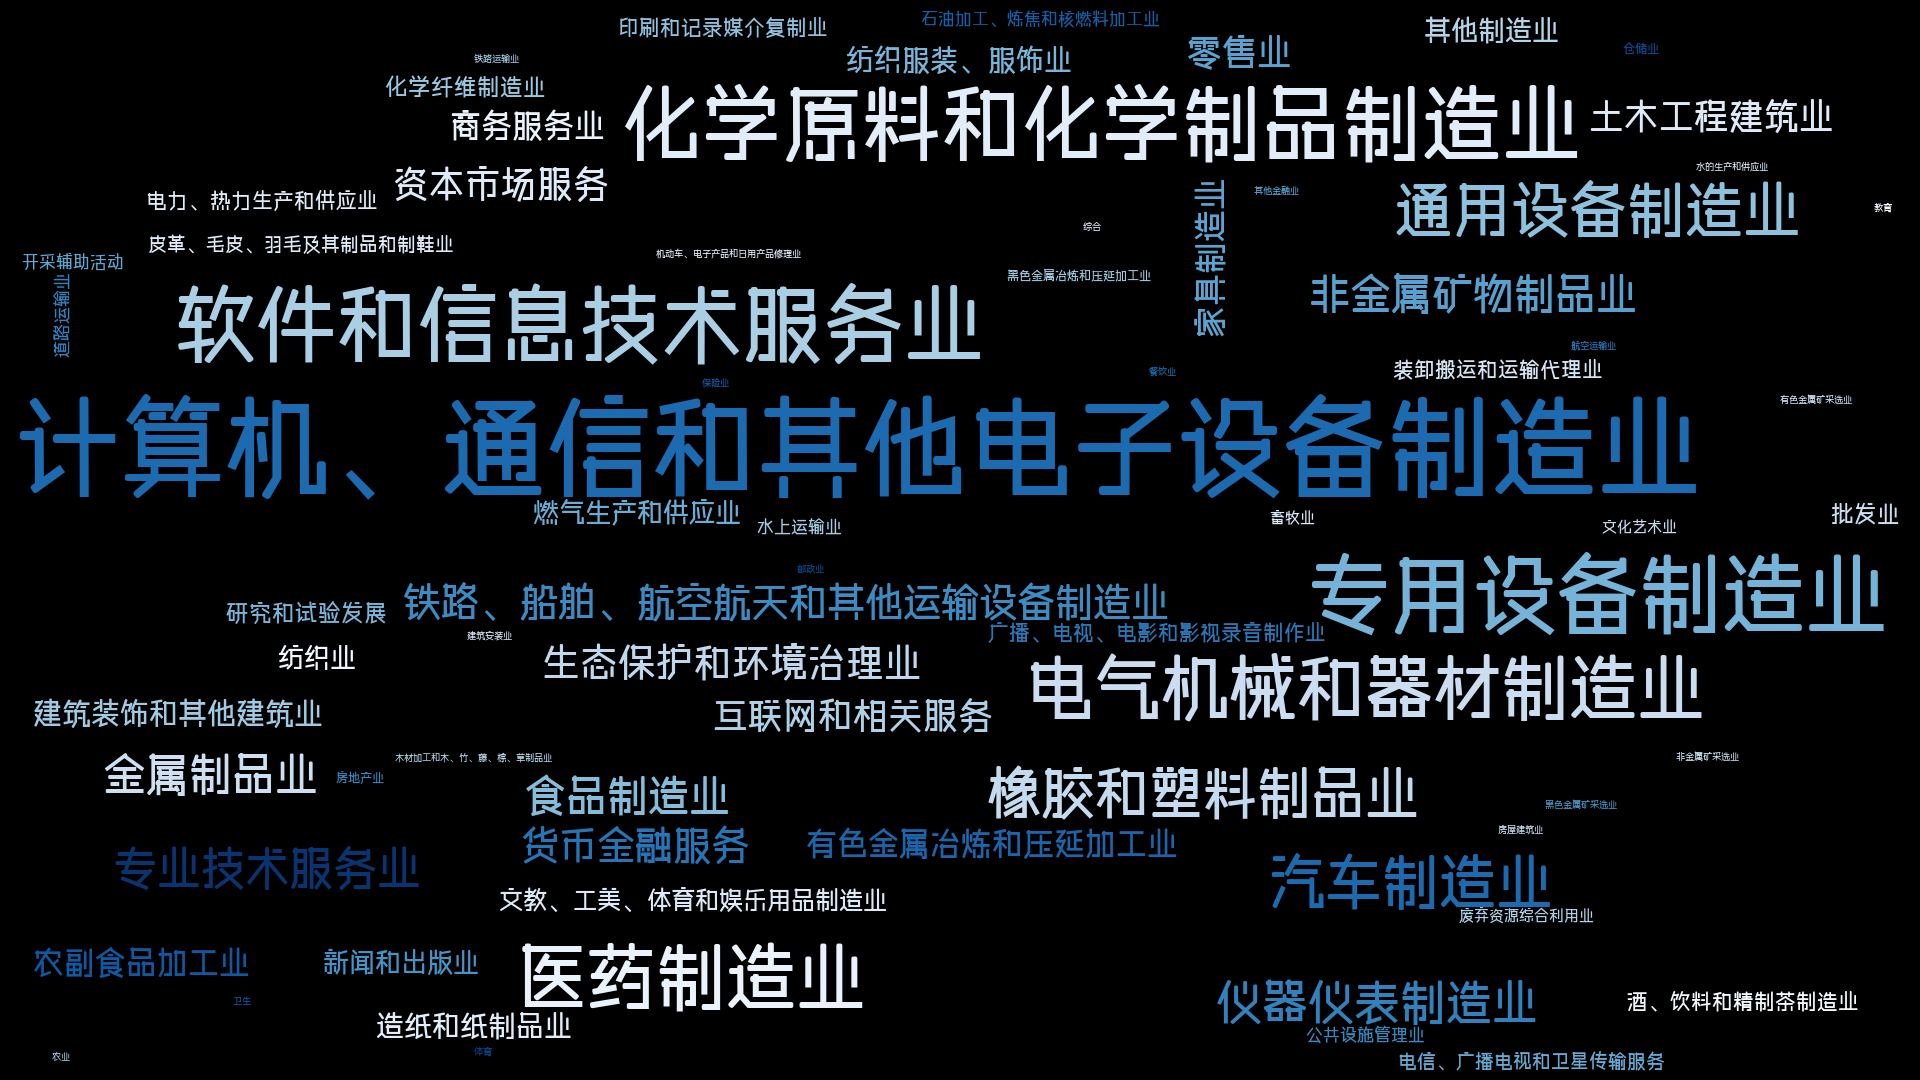

In [21]:
#行业词云，字体大小代表频率
frequency ={}
frequency = dict(dataV2.groupby('证监会行业(2012版)').size()) #读取行业出现频次并以词典形式储存
wc = WordCloud(font_path = r"C:\Users\Lenovo\Desktop\大作业最终展示版\SanJiShaHeiJianTi-2.ttf", \
                      background_color = 'Black',\
                      width = 1920, height = 1080, colormap='Blues')
wc.generate_from_frequencies(frequency) #根据统计数据绘制词云
wc.to_image()

In [22]:
#上市公司省份统计
count =[]
count = dataV2.groupby('省份').size() #统计不同省份出现次数
province = list(dict(count).keys()) #以列表形式存储省份名称
sequence = list(zip(province,count)) #将对应省份名称列表和次数列表打包成元组并以列表形式储存
#利用Map模块绘制地图
map_1 = Map()
map_1.add("", sequence, "china")\
.set_global_opts(title_opts=opts.TitleOpts(title="全国各省"), \
                 visualmap_opts=opts.VisualMapOpts(max_=300,min_=0))#配置地图，设置图例最大值最小值
map_1.render_notebook()

In [23]:
#探索数据：绘制散点图，了解数据大致分布
def at_a_glance(x, y):
    plt.scatter(x, y, color="green", label=y.name)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()

In [24]:
#回归分析
def regression_analysis(x, y):
    
    #建立训练数据和测试数据
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    
    #将训练数据特征转换成二维数组XX行*1列
    x_train=x_train.values.reshape(-1,1)
    #将测试数据特征转换成二维数组行数*1列
    x_test=x_test.values.reshape(-1,1)
    
    #使用sklearn对数据建模
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    
    #截距
    a=regressor.intercept_
    #回归系数
    b=regressor.coef_
    print('最佳拟合线：截距a=',a,' 回归系数b=',b)
    
    #绘制输出
    plt.scatter(x_train, y_train, color='green', label="train data")
    y_train_pred = regressor.predict(x_train)
    plt.plot(x_train, y_train_pred, color='black', linewidth=3, label="best line")
    plt.legend(loc=2)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.legend(loc = 'best')
    plt.show()
    
    #使用测试数据评估模型
    y_test_predict=regressor.predict(x_test)
    print("Residual mean of squares: %.2f" % np.mean((y_test_predict - y_test) ** 2))
    print('Variance score: %.2f' % regressor.score(x_test , y_test))
    
    plt.scatter(x_train, y_train, color='blue', label="train data")
    y_train_pred = regressor.predict(x_train)
    plt.plot(x_train, y_train_pred, color='black', linewidth=3, label="best line")
    plt.scatter(x_test, y_test, color='red', label="test data")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.legend(loc = 'best')
    plt.show()

In [25]:
#“包销比例”与“上市首日涨跌幅%”的相关性程度分析
#读取数据
cdf = dataV2[['包销比例', '上市首日涨跌幅%']]
cdf.head()

,包销比例,上市首日涨跌幅%
0,0.08,240.38
1,0.18,43.98
2,0.30,44.01
3,0.11,203.98
4,0.04,204.03


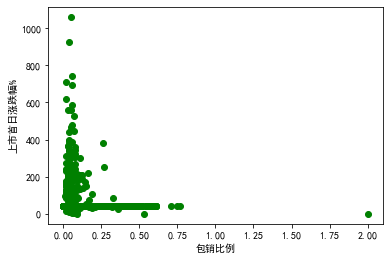

In [26]:
#使用函数查看“包销比例”与“上市首日涨跌幅%”的数据分布
x = cdf.loc[:,'包销比例']
y1 = cdf.loc[:,'上市首日涨跌幅%']
at_a_glance(x, y1)

最佳拟合线：截距a= 104.79518292009212  回归系数b= [-196.93108029]


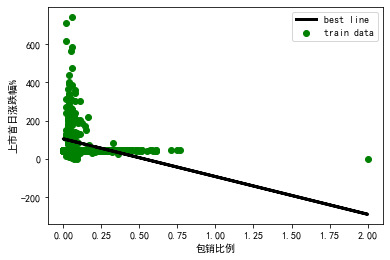

Residual mean of squares: 9632.31
Variance score: 0.11


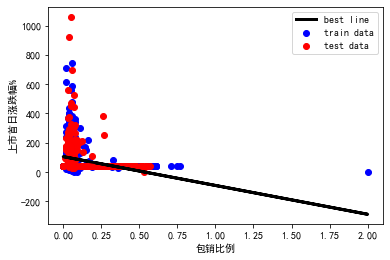

In [27]:
#使用函数进行回归分析
regression_analysis(x, y1) 

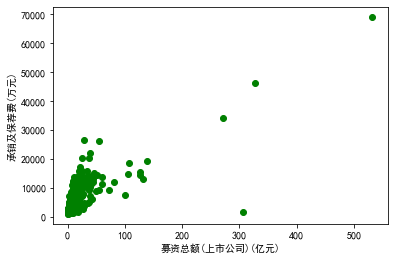

In [28]:
#“募资总额”与”承销及保荐费“的相关性程度分析
#读取数据
cdf = dataV2[['募资总额(上市公司)(亿元)', '承销及保荐费(万元)']]
x = cdf.loc[:,'募资总额(上市公司)(亿元)']
y = cdf.loc[:,'承销及保荐费(万元)']
#使用函数查看”募资总额“与”承销及保荐费“的数据分布
at_a_glance(x, y)

最佳拟合线：截距a= 3609.2041220462565  回归系数b= [109.00522787]


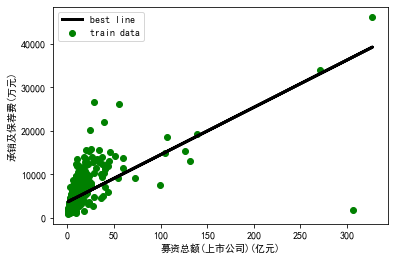

Residual mean of squares: 3533169.25
Variance score: 0.78


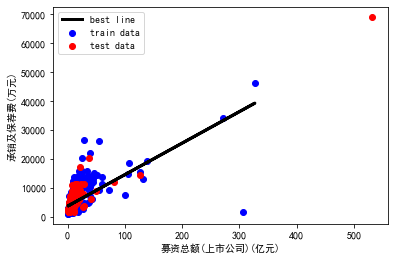

In [29]:
#使用函数进行回归分析
regression_analysis(x, y)